In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# set amount of visible rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [3]:
# paths of the files to read
train_data_path = 'C:\\Users\\Mary\\Downloads\\house-prices-advanced-regression-techniques\\train.csv'
test_data_path = 'C:\\Users\\Mary\\Downloads\\house-prices-advanced-regression-techniques\\test.csv'
sample_submission_path = 'C:\\Users\\Mary\\Downloads\\house-prices-advanced-regression-techniques\\sample_submission.csv'

In [4]:
# read files into variables
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_path)

In [5]:
# split train data into X and y
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1:]

# create X_test and y_test 
X_test = test_data

## Data analyse

In [6]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2  ... WoodDeckSF OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       Norm  ...          0          61              0          0   
1       Norm  ...        298           0              0          0   
2       Norm  ...          0          42              0          0   
3       Norm  ...          0          35            272          0   
4       Norm  ...        192          84              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature MiscVal MoSold  YrSold  \
0            0         0    NaN   NaN         NaN       0      2    2008   
1            0         0    NaN   NaN         NaN       0      5    2007   
2            0         0    NaN   NaN         NaN       0      9    2008   
3            0         0    NaN   NaN         NaN       0      2    2006   
4            0         0    NaN   NaN         NaN       0     12    2008   

  SaleType SaleCondition SalePrice  
0       WD        Normal    208500  
1       WD        Normal    181500  
2       WD        Normal    223500  
3       WD       Abnorml    140000  
4       WD        Normal    250000  

[5 rows x 81 columns]

In [7]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2  ... PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0       Norm  ...          Y        140            0              0   
1       Norm  ...          Y        393           36              0   
2       Norm  ...          Y        212           34              0   
3       Norm  ...          Y        360           36              0   
4       Norm  ...          Y          0           82              0   

   3SsnPorch  ScreenPorch PoolArea PoolQC  Fence MiscFeature MiscVal  MoSold  \
0          0          120        0    NaN  MnPrv         NaN       0       6   
1          0            0        0    NaN    NaN        Gar2   12500       6   
2          0            0        0    NaN  MnPrv         NaN       0       3   
3          0            0        0    NaN    NaN         NaN       0       6   
4          0          144        0    NaN    NaN         NaN       0       1   

  YrSold SaleType SaleCondition  
0   2010       WD        Normal  
1   2010       WD        Normal  
2   2010       WD        Normal  
3   2010       WD        Normal  
4   2010       WD        Normal  

[5 rows x 80 columns]

In [8]:
sample_submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

### Quick look at statistical summary

In [9]:
train_data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [10]:
test_data.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [11]:
print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')

train data shape: (1460, 81)
test data shape: (1459, 80)


### Store the numeric, categorical & target features names in separate variables

In [12]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Note: MSSubClass is interpreted as int, but actually it's nominative 

In [13]:
numeric_cols = list(train_data.select_dtypes("float64").columns) + list(train_data.select_dtypes("int64").columns)
numeric_cols.remove('SalePrice')
numeric_cols.remove('MSSubClass')
categorical_cols = list(train_data.select_dtypes("object").columns) + ['MSSubClass']
target = 'SalePrice'
print(f'numeric columns:\n{numeric_cols}\namount: {len(numeric_cols)}\n\ncategorical columns:\n{categorical_cols}\namount: {len(categorical_cols)}\n\ntarget:\n{target}')


numeric columns:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
amount: 36

categorical columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType'

### Sale price distribution 

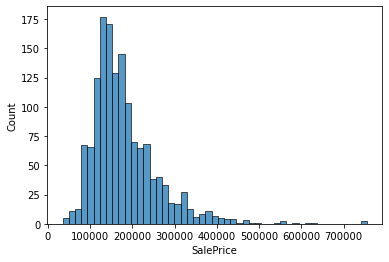

In [14]:
sns.histplot(train_data['SalePrice'])

We have a positive skew

### Train and Test data numeric columns distribution comparison

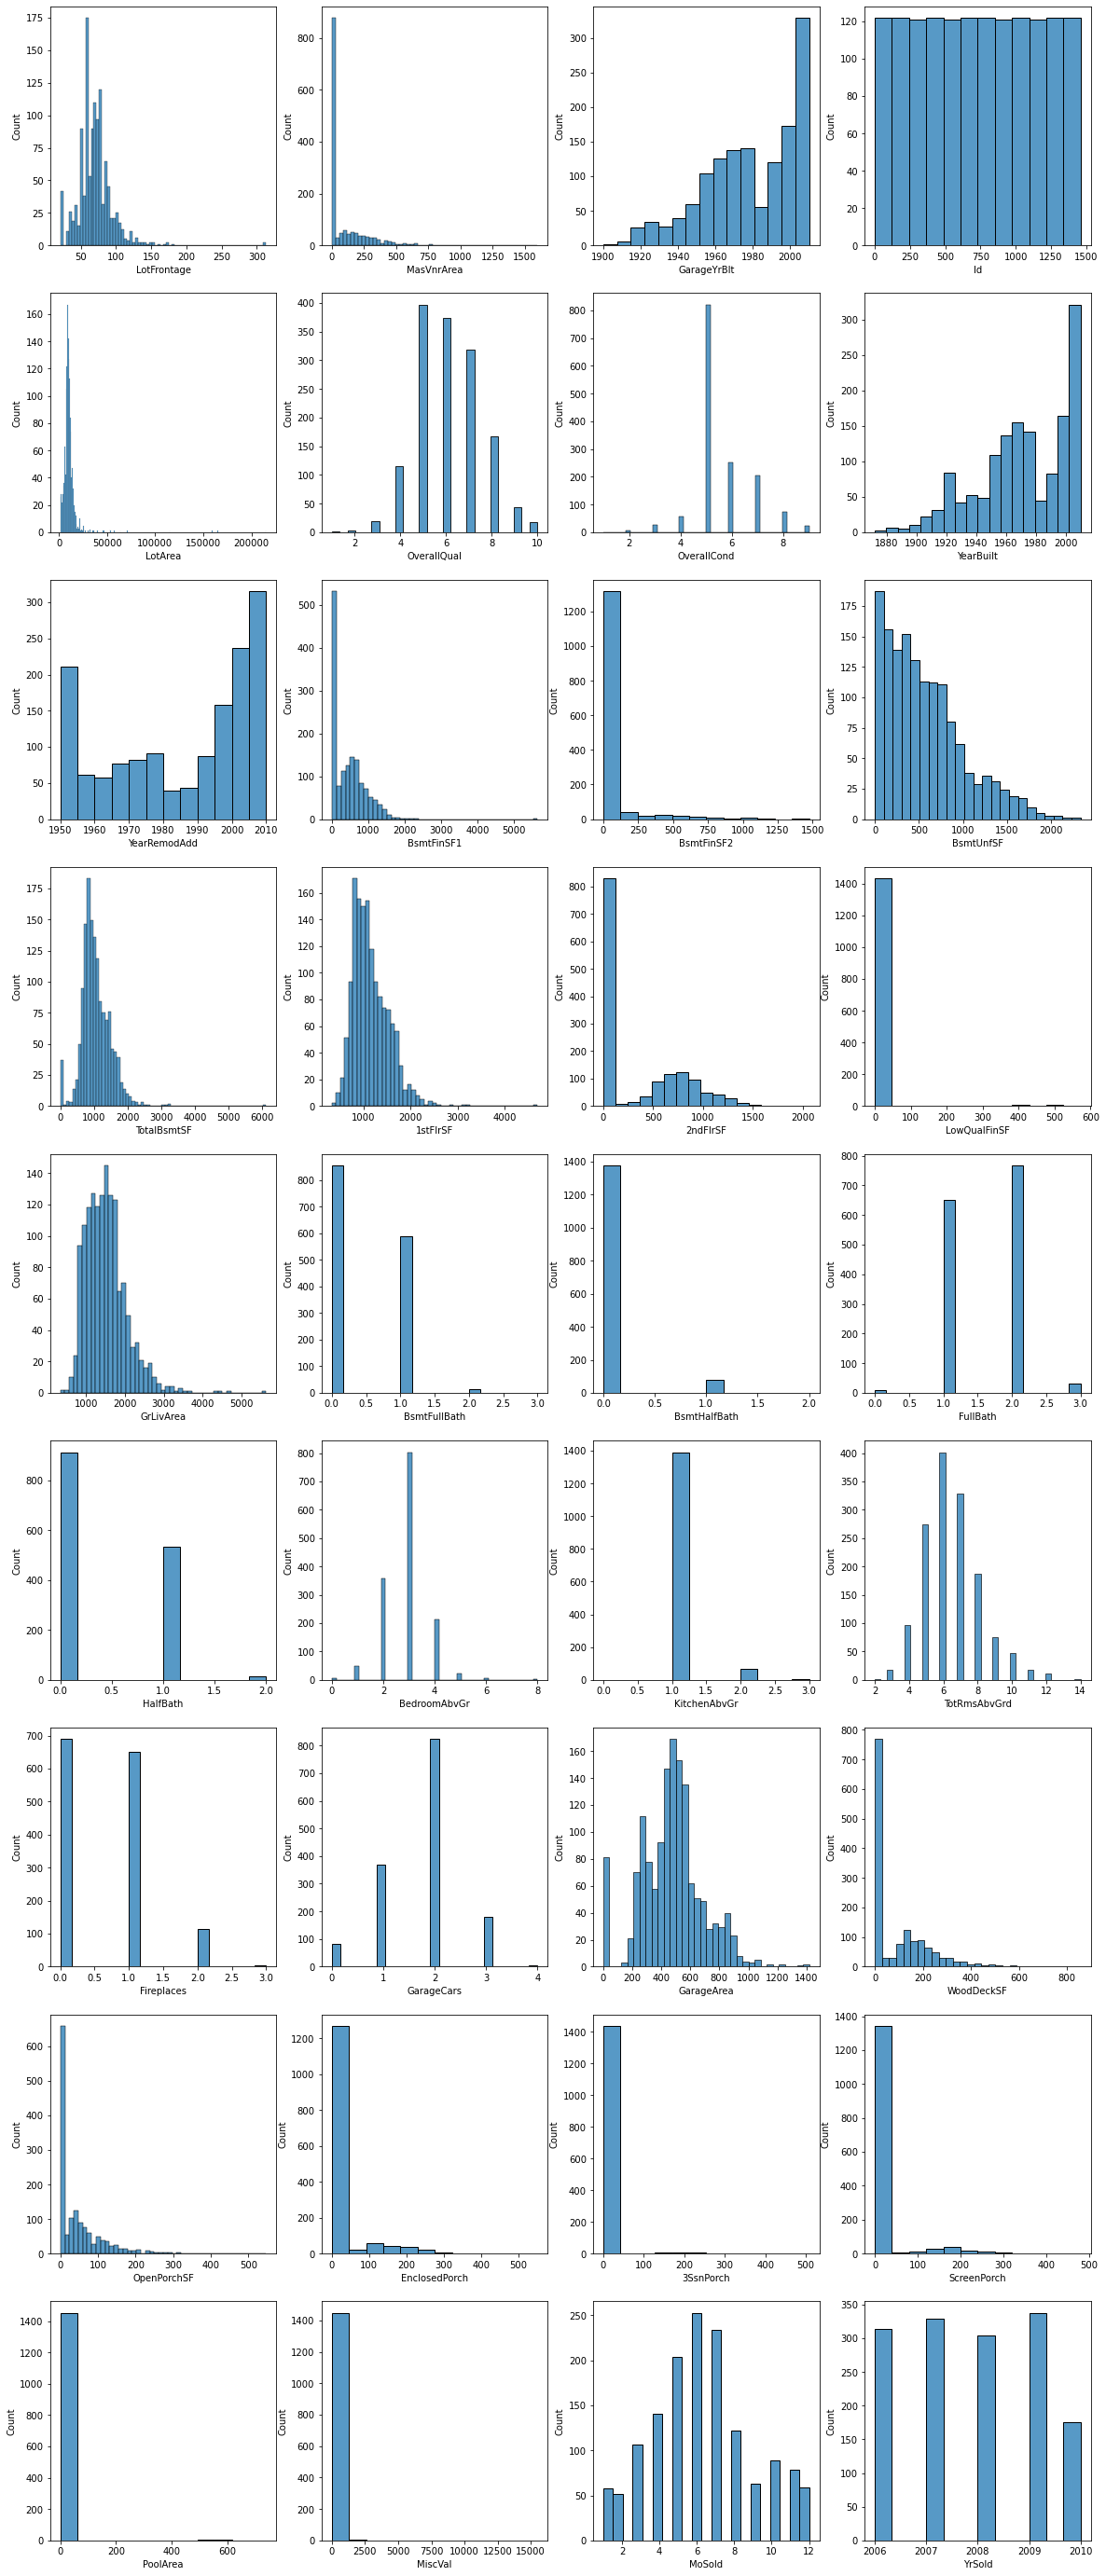

In [15]:
fig,ax = plt.subplots(9, 4, figsize=(20, 50))
row = col = 0
for n,i in enumerate(numeric_cols):
    if (n%4 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(train_data[i], ax=ax[row,col])
    col += 1

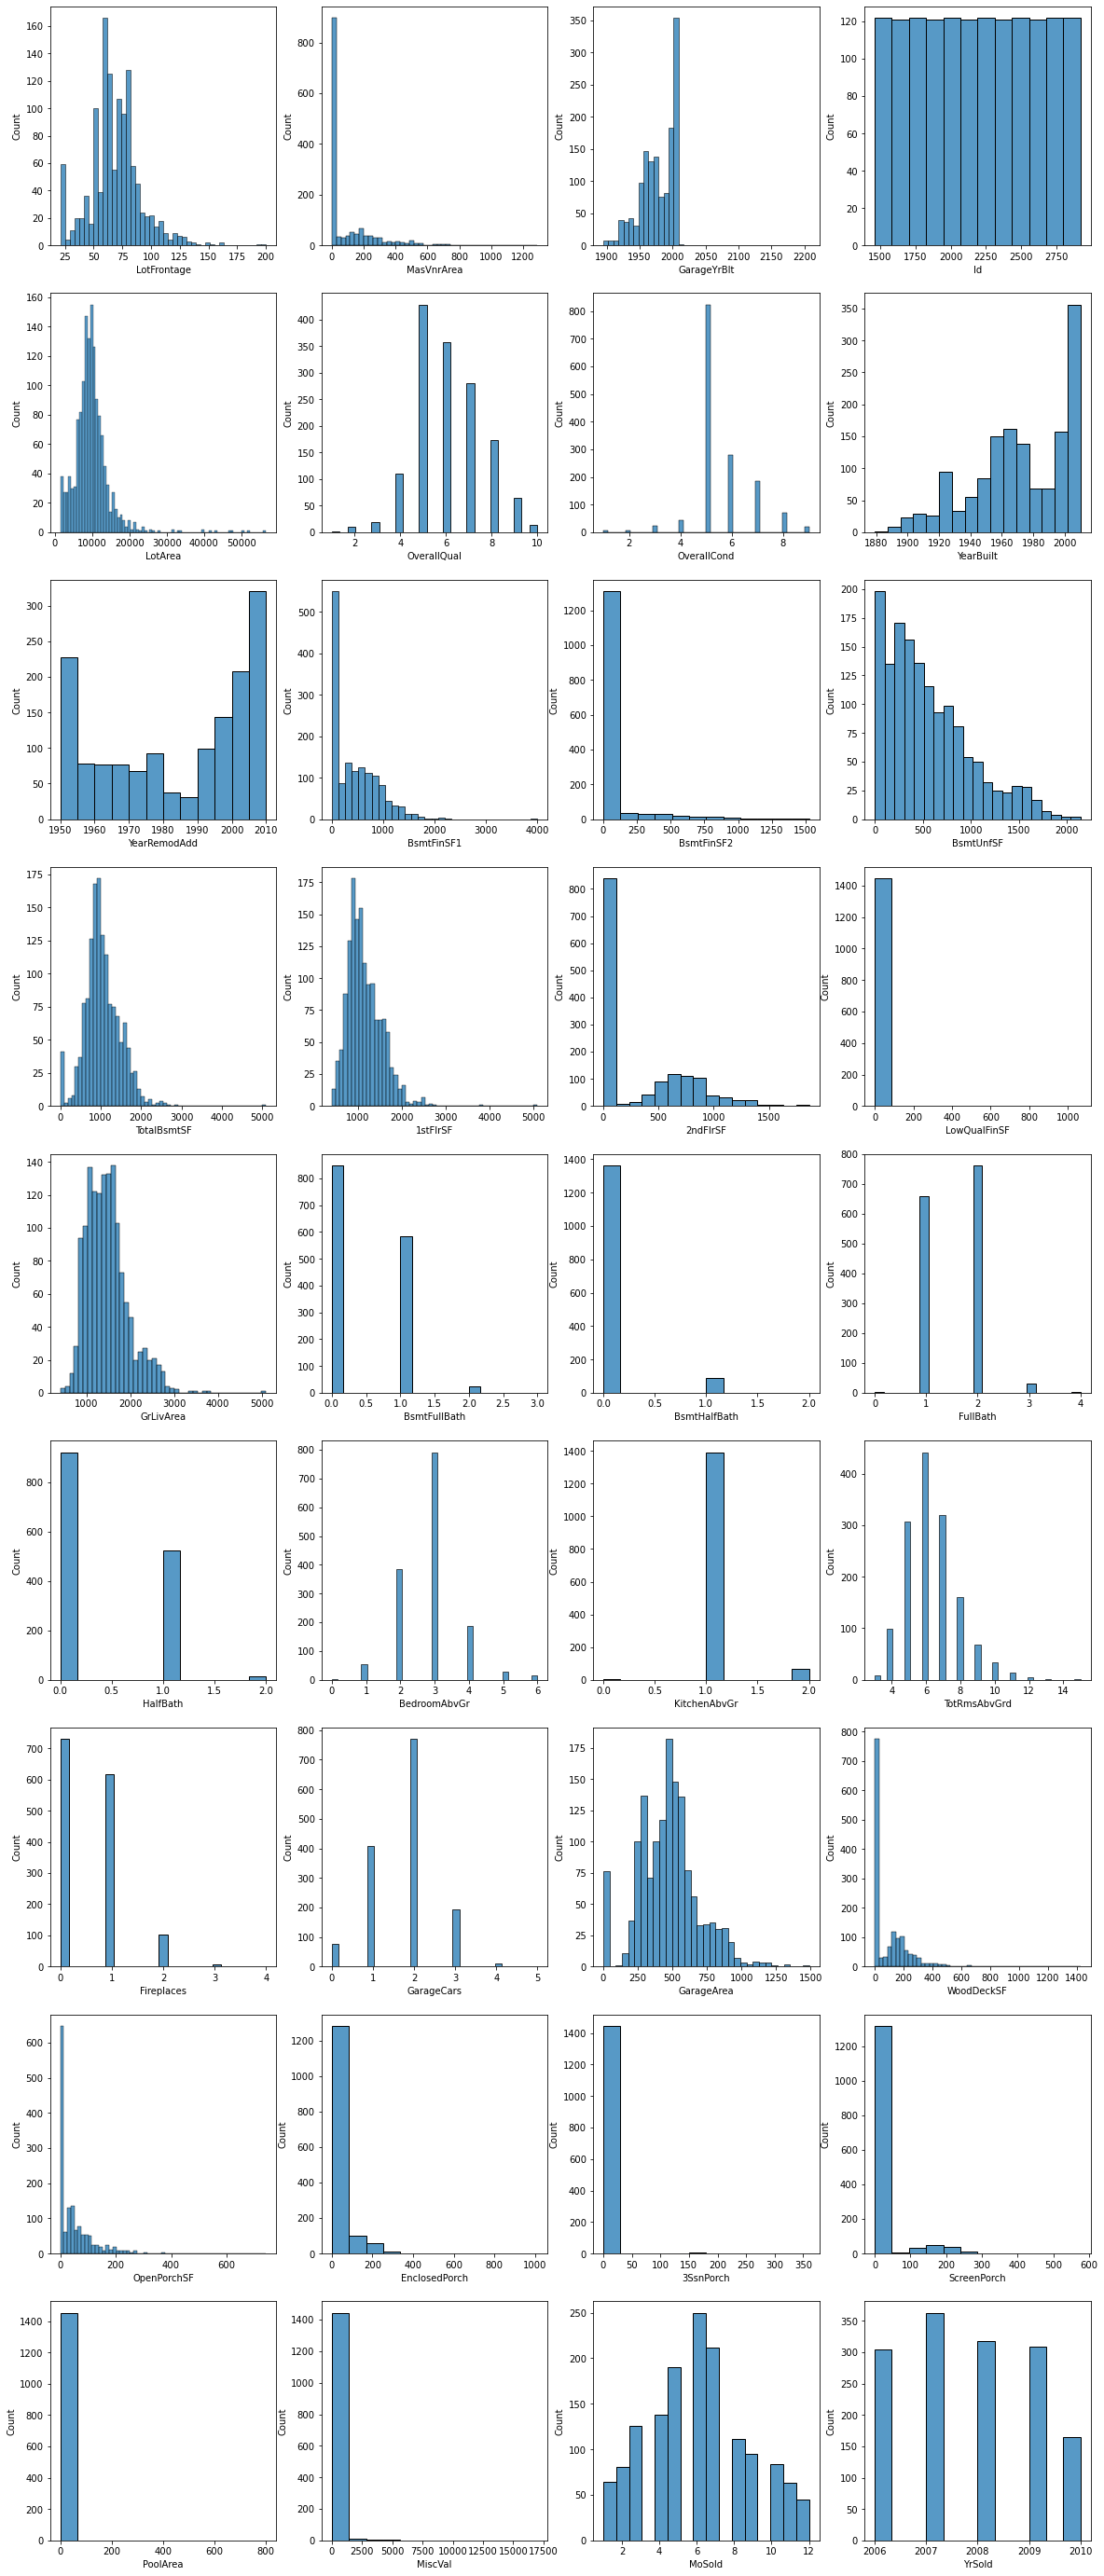

In [16]:
fig,ax = plt.subplots(9, 4, figsize=(20, 50))
row = col = 0
for n,i in enumerate(numeric_cols):
    if (n%4 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(test_data[i], ax=ax[row,col])
    col += 1

According to histograms there are __outliers__ in some columns. <br>
Whey can influence bad on models, so I decided to create a dictionary to use it later. In there key is a column name and value is a border for outliers
<br>

<br>
Also we can see distribution in test and train are similar in the most of features exept of some outliner cases

In [17]:
outliners_dict = {'LotFrontage' : 200, 'MasVnrArea' : 1000, 'LotArea' : 50000, 'GarageYrBlt' : 2020, 
                  'BsmtFinSF1' : 2000, 'BsmtFinSF2' : 1000, 'TotalBsmtSF' : 3500, '1stFlrSF' : 3500, 
                  'LowQualFinSF' : 0, 'WoodDeckSF' : 600, 'OpenPorchSF' : 400, 'EnclosedPorch' : 400, 
                  '3SsnPorch' : 0, 'ScreenPorch' : 300, 'PoolArea' : 0, 'MiscVal' : 0}
len(outliners_dict)

16

### Numeric data correlation

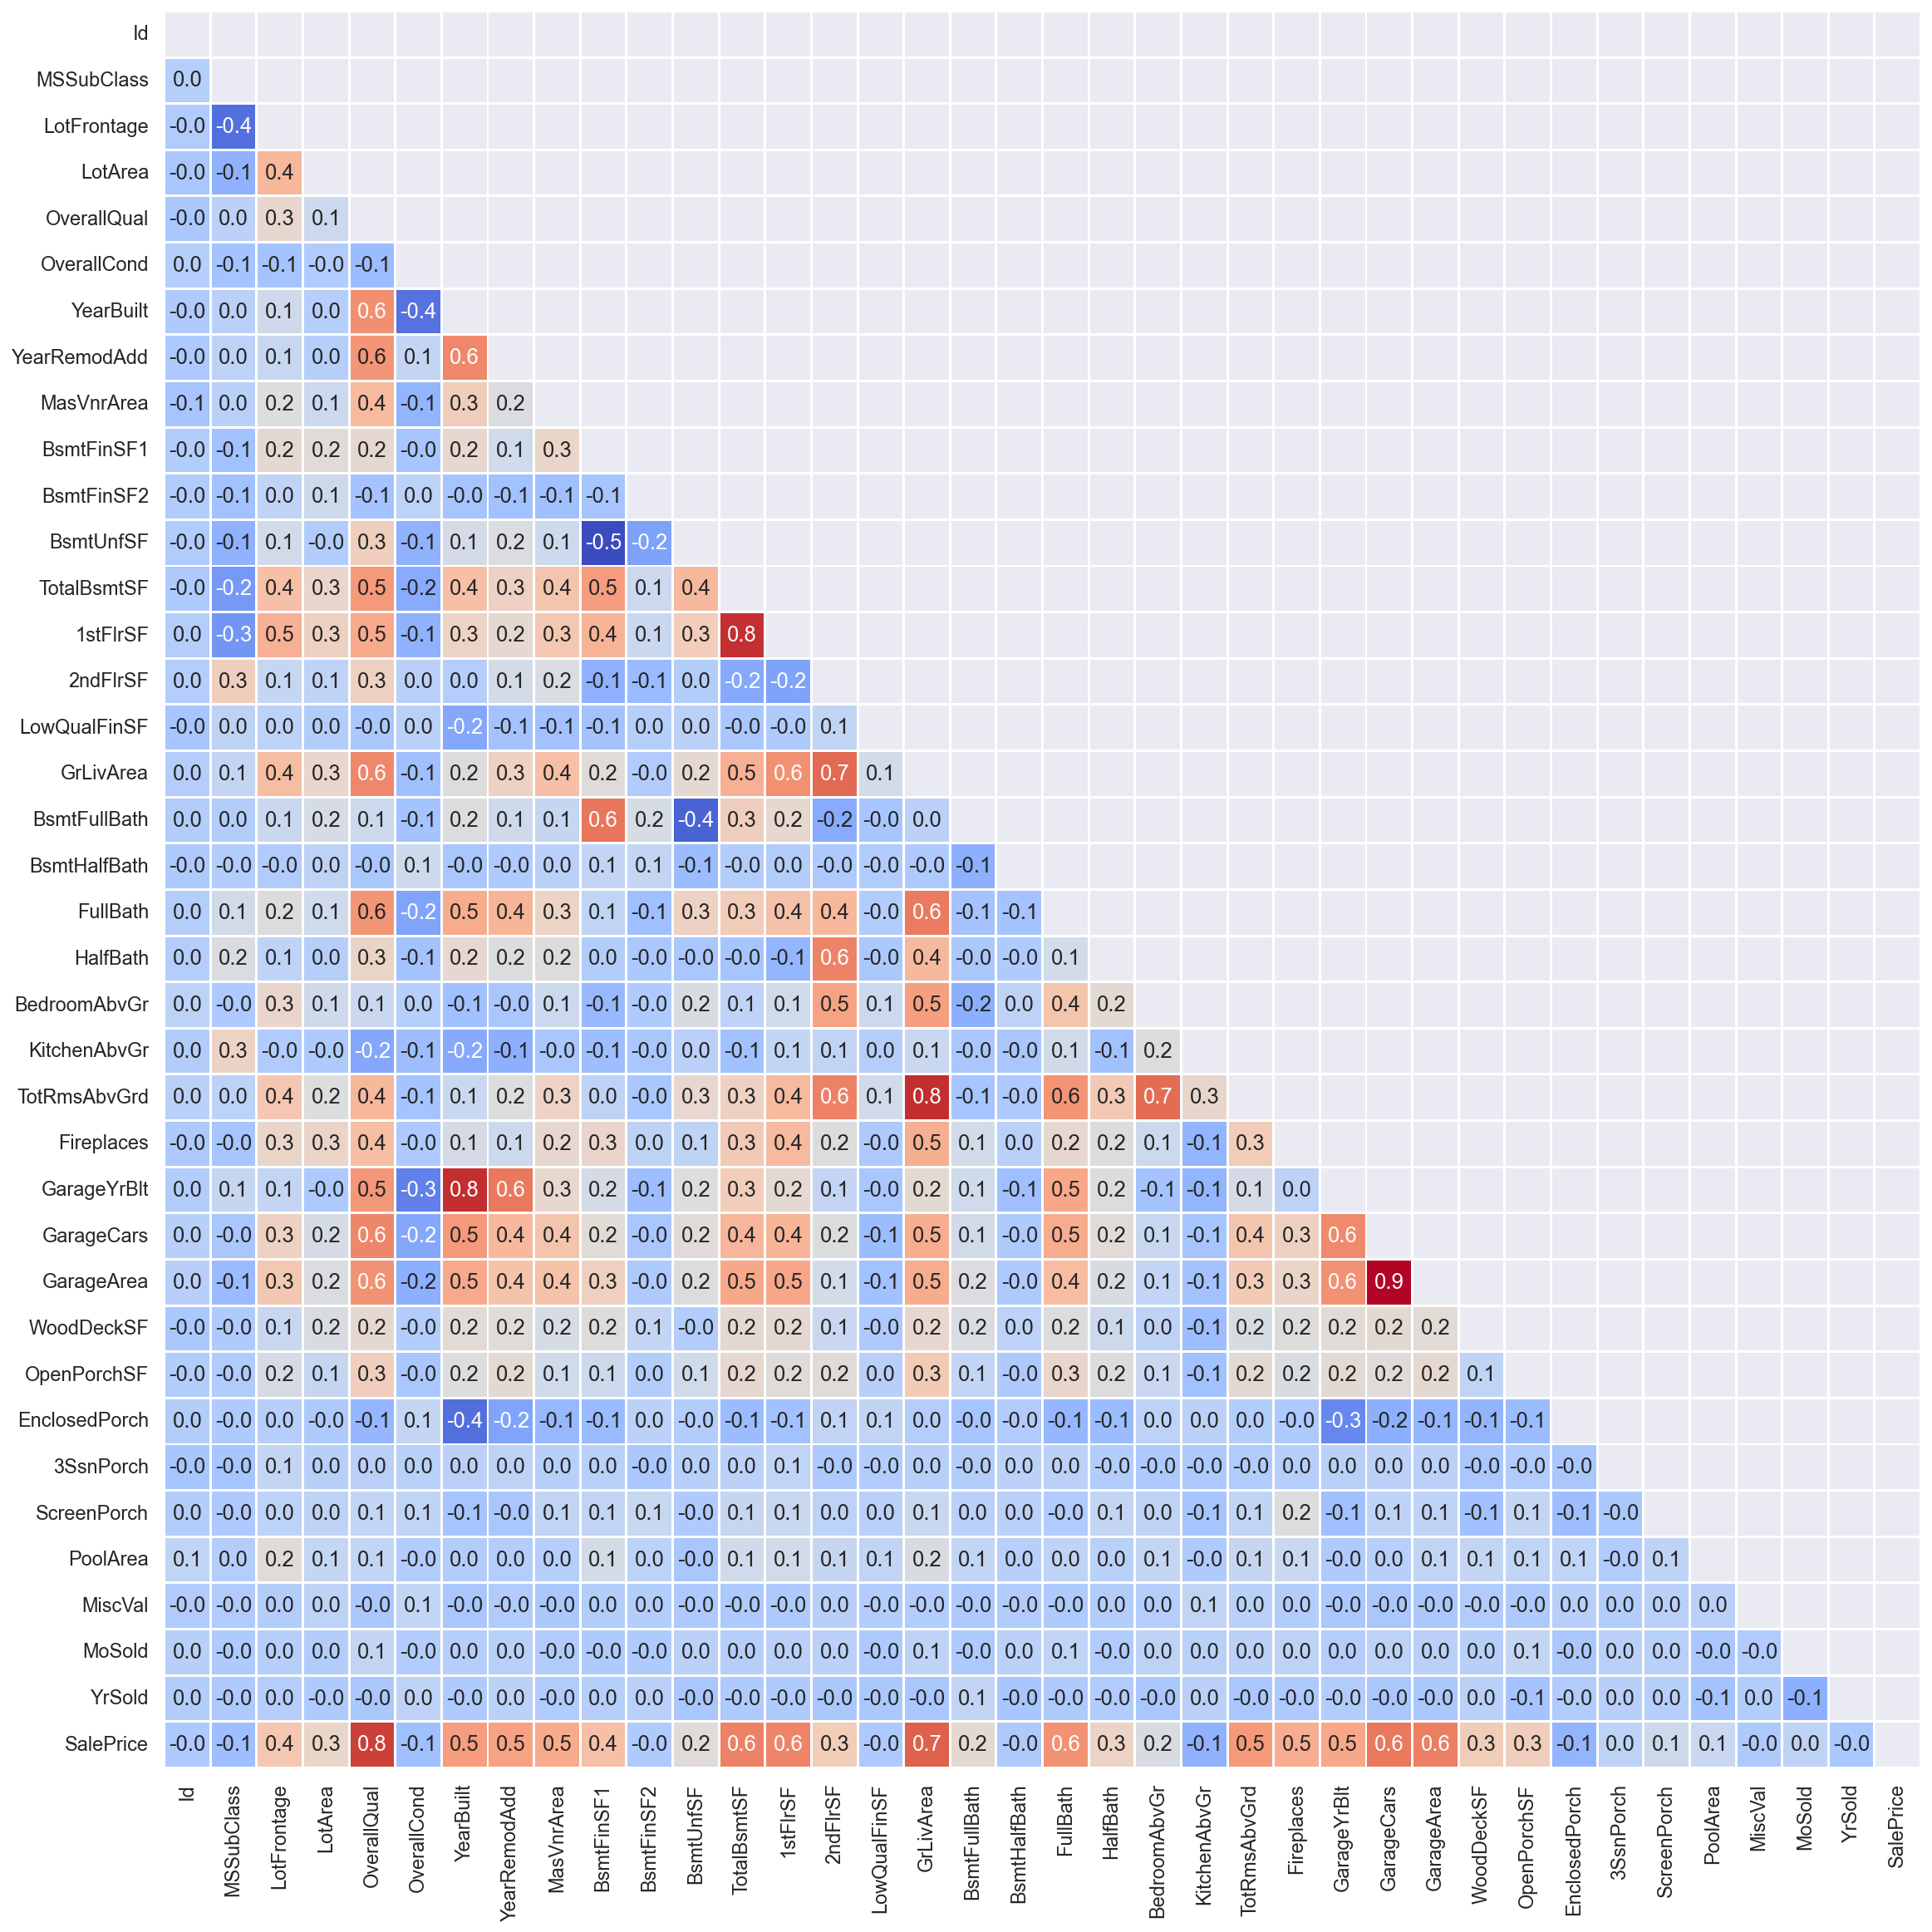

In [18]:
correlation_matrix = train_data.corr()

# Returns copy of array with upper part of the triangle (which will be masked/hidden)
mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=1.1)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix,  fmt='.1f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False, annot=True)
plt.show()

__According to correlation matrix there are several highly correlated variables:__
<br>
- GarageYrBuild and YearBuild (0.8)
- 1stFlSF and TotalBsmtSF (0.8)
- GarageArea and GarageCars (0.9)
- TotRmsAbvGrd and GrLivArea (0.8)
<br><br>
Performance of the model can be impacted because of high correlation. But __decision trees__ and __boosted trees__ algorithms are immune to multicollinearity by nature. I'll use __Random Forest__ and __XGBoost__ so it's not nessesary to remove one of correlated features in each pair, but they are still not so useful, so I'll deal with it later

### Categorical data visualisation

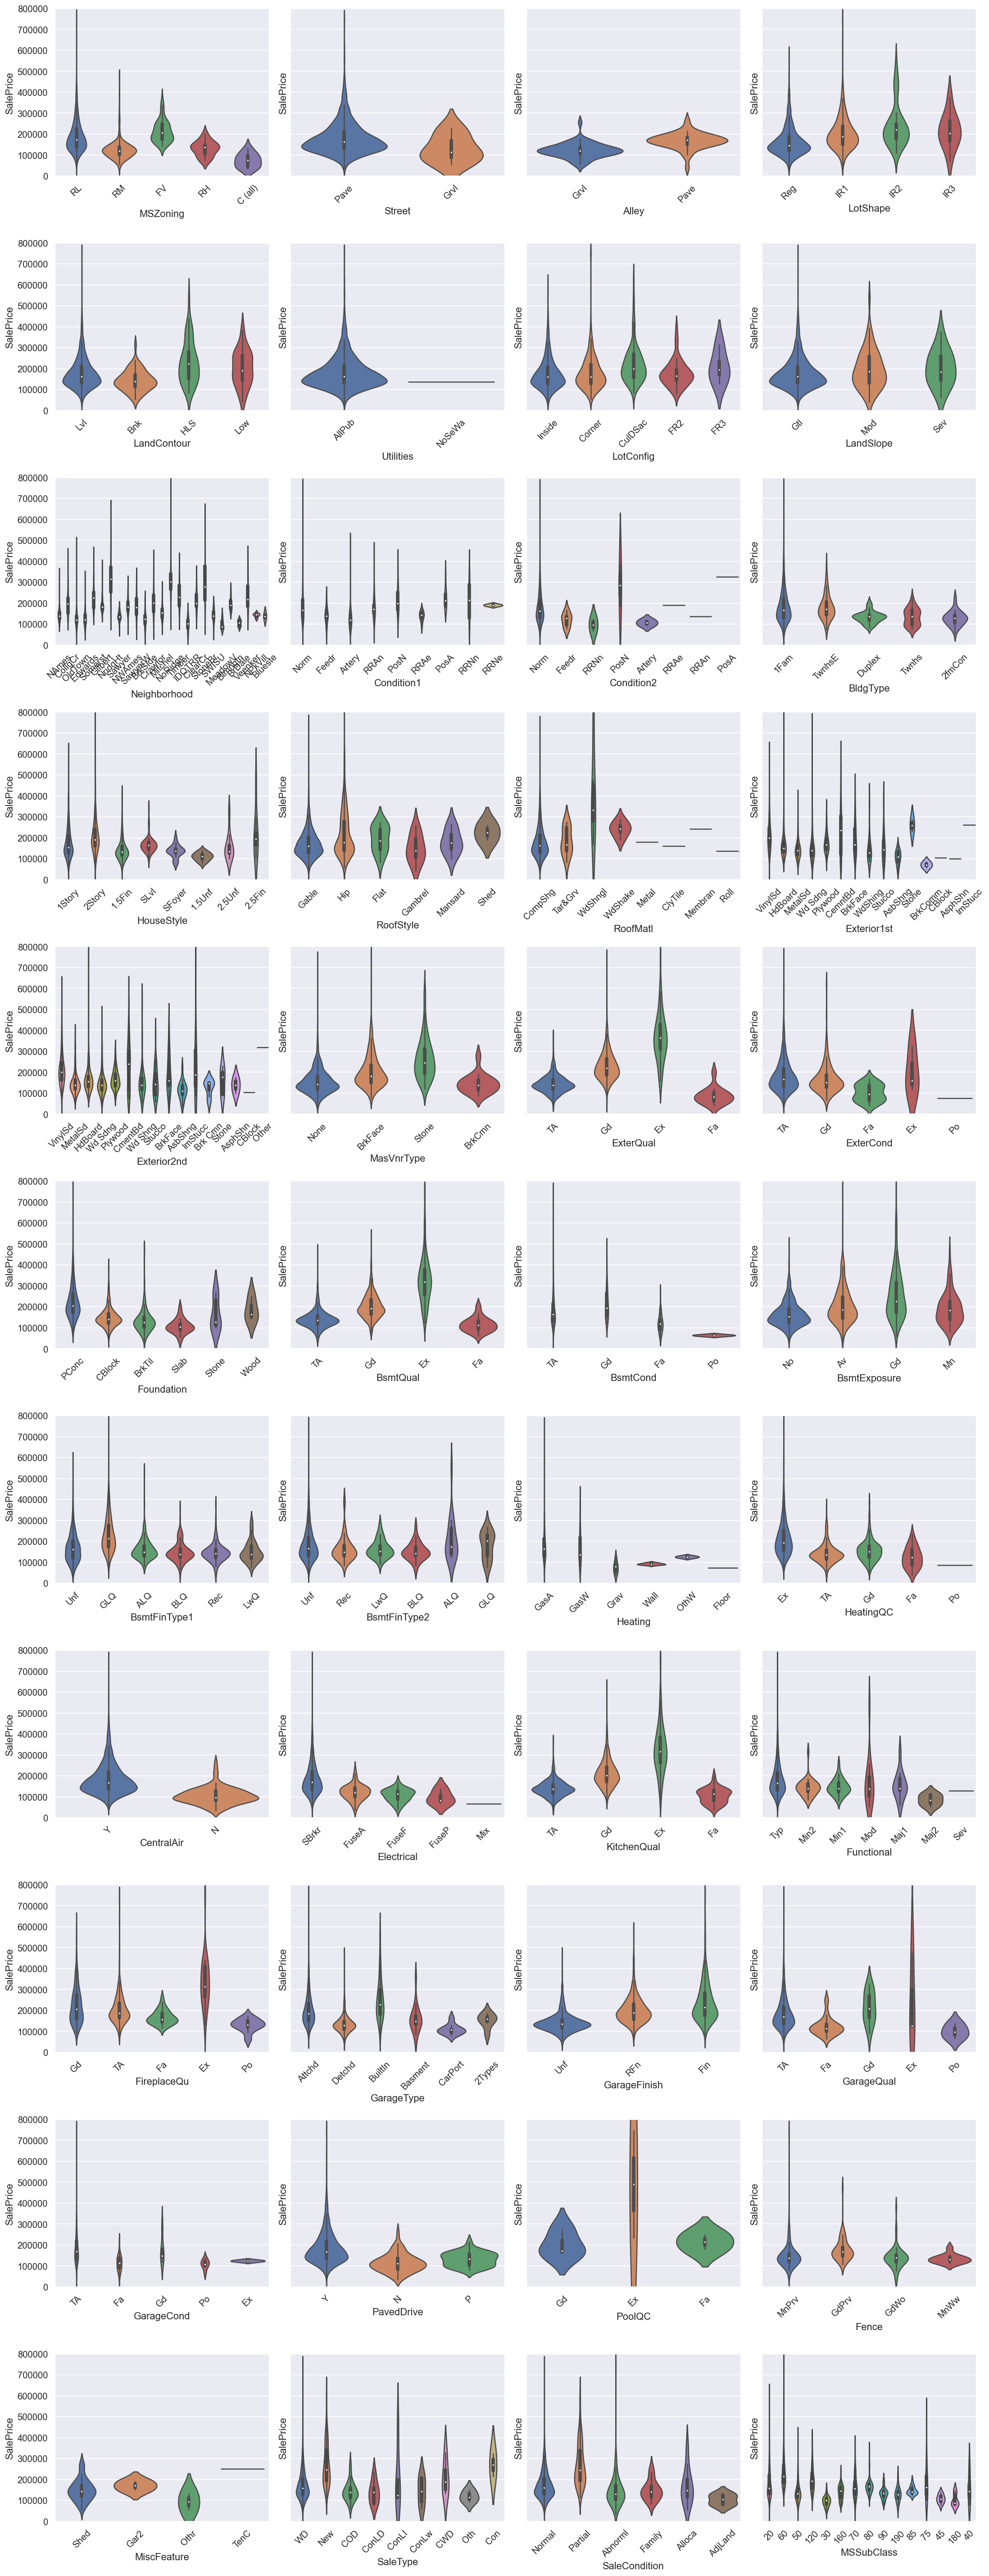

In [19]:
fig, ax = plt.subplots(nrows=11, ncols=4, figsize=(22, 1.4*len(categorical_cols)), sharey=True, dpi=120)

for col, subplot in zip(categorical_cols, ax.flatten()):
    freq = X[col].value_counts()
    subplot.ticklabel_format(style='plain')
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=.1,hspace=.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
    sns.violinplot(data=train_data, x=col, y=target, order=freq.index, ax=subplot)

As we can see __Utilities__ feature has mostly one category. So it's useless for model and we can drop this column in future

### Check NAN values

In [20]:
# to check if there Null elements for each label
def check_null_values(df):
    null_values = pd.DataFrame(df.dtypes, columns=['Dtype'])
    null_values['Null'] = df.isnull().sum().values
    null_values = null_values.sort_values(by=['Null'], ascending=False)
    return null_values

In [21]:
# to check Null elements both in X_test and X_train
def check_null_X_values(X_train, X_test):
    null_values_train = X_train.isnull().sum()
    null_values_test = X_test.isnull().sum()

    # making DataFrame for combining training and testing missing values
    null_values = pd.DataFrame(null_values_train)
    null_values['Test Data'] = null_values_test.values
    null_values.rename(columns = {0:'Train Data'}, inplace = True)

    # showing only columns having missing values and sorting them
    null_values = null_values.loc[(null_values['Train Data']!=0) | (null_values['Test Data']!=0)]
    null_values = null_values.sort_values(by=['Train Data','Test Data'], ascending=False)
        
    return null_values

In [22]:
# check there is no Null values in target
check_null_values(y)

Dtype  Null
SalePrice  int64     0

In [23]:
check_null_X_values(X, X_test)

Train Data  Test Data
PoolQC              1453       1456
MiscFeature         1406       1408
Alley               1369       1352
Fence               1179       1169
FireplaceQu          690        730
LotFrontage          259        227
GarageYrBlt           81         78
GarageFinish          81         78
GarageQual            81         78
GarageCond            81         78
GarageType            81         76
BsmtExposure          38         44
BsmtFinType2          38         42
BsmtCond              37         45
BsmtQual              37         44
BsmtFinType1          37         42
MasVnrType             8         16
MasVnrArea             8         15
Electrical             1          0
MSZoning               0          4
Utilities              0          2
BsmtFullBath           0          2
BsmtHalfBath           0          2
Functional             0          2
Exterior1st            0          1
Exterior2nd            0          1
BsmtFinSF1             0          1
BsmtFinSF2             0          1
BsmtUnfSF              0          1
TotalBsmtSF            0          1
KitchenQual            0          1
GarageCars             0          1
GarageArea             0          1
SaleType               0          1

In [24]:
# we can drop columns where more than half of values is Null because there are few information in them
cols_to_delete= []

for col in X.columns:
    if X[col].isnull().sum() > len(X[col]) / 2:
        cols_to_delete.append(col)

cols_to_delete

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [25]:
X.drop(cols_to_delete ,axis=1 ,inplace=True)
X_test.drop(cols_to_delete ,axis=1 ,inplace=True)

In [26]:
print(f'X train shape: {X.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (1460, 76)
X test shape: (1459, 76)


## Creating new features

In [27]:
# merge the datasets to process them together
df = pd.concat([X, X_test])

### Creating new boolean features

#### Garage:
False for rows having missing values in columns GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
#### Fireplase:
False for rows having missing values in column FireplaceQu
#### Bsmt:
False for rows having missing values in columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
#### Masorny:
False for rows having missing values in columns MasVnrType, MasVnrArea

In [28]:
df1 = pd.DataFrame()  # dataframe to hold new features

df1['Garage'] = df['GarageQual'].notnull()
df1['Fireplace'] = df['FireplaceQu'].notnull()
df1['Bsmt'] = df['BsmtQual'].notnull()
df1['Masonry'] = df['MasVnrType'].notnull()

# converting boolean columns [False,True] into numerical columns [0,1]
df1 = df1.replace([False,True], [0,1])

for col in df1.columns:
    df1[col] = df1[col].astype('int8')

df1.head()

Garage  Fireplace  Bsmt  Masonry
0       1          0     1        1
1       1          1     1        1
2       1          1     1        1
3       1          1     1        1
4       1          1     1        1

### Creating new numerical features

In [29]:
df2 = pd.DataFrame()

df2['Age'] = df['YrSold']-df['YearBuilt']
df2['AgeRemod'] = df['YrSold'] - df['YearRemodAdd']

years = ['YrSold','YearBuilt','YearRemodAdd']

In [30]:
df3 = pd.DataFrame()

baths = ['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath']
df3['TotalBath'] = df.FullBath + df.BsmtFullBath + df.HalfBath/2 + df.BsmtHalfBath/2

## Concat created features with original

In [31]:
df.drop(years+baths, axis=1, inplace=True)
df = pd.concat([df, df1, df2, df3], axis=1)

In [32]:
df.shape

(2919, 76)

## Categorical data preprocessing

In [33]:
# look at list of categorical variables
categorical_cols = list(df.select_dtypes("object").columns) + ['MSSubClass']
print('categorical variables:')
print(categorical_cols)
print()
print(f'amount: {len(categorical_cols)}')

categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass']

amount: 40


In [34]:
# to check amount of unique elements for each label
def check_unique_values(df):
    unique_values = pd.DataFrame(df.dtypes, columns=['Dtype'])
    unique_values['Unique'] = df.nunique().values
    unique_values = unique_values.sort_values(by=['Unique'], ascending=False)
    return unique_values

In [35]:
check_unique_values(df[categorical_cols])

Dtype  Unique
Neighborhood   object      25
MSSubClass      int64      16
Exterior2nd    object      16
Exterior1st    object      15
Condition1     object       9
SaleType       object       9
RoofMatl       object       8
Condition2     object       8
HouseStyle     object       8
Functional     object       7
GarageType     object       6
BsmtFinType1   object       6
RoofStyle      object       6
SaleCondition  object       6
Foundation     object       6
Heating        object       6
BsmtFinType2   object       6
FireplaceQu    object       5
GarageQual     object       5
GarageCond     object       5
Electrical     object       5
HeatingQC      object       5
MSZoning       object       5
BldgType       object       5
ExterCond      object       5
LotConfig      object       5
MasVnrType     object       4
LotShape       object       4
LandContour    object       4
BsmtCond       object       4
BsmtExposure   object       4
KitchenQual    object       4
ExterQual      object       4
BsmtQual       object       4
LandSlope      object       3
GarageFinish   object       3
PavedDrive     object       3
Utilities      object       2
CentralAir     object       2
Street         object       2

There are 4 features with high scaling, but we'll use tree-based models, so it's not nessesary to use one-hot encoding. That mean this features will not affect on finally feature amount

### Process ordered categorical columns

In [36]:
# ordered categorical columns according to data description
ordered_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']
len(ordered_cols)

13

In [37]:
# filling Null values with 'NA'
df[ordered_cols] = df[ordered_cols].fillna('NA')

{col:[*df[col].unique()] for col in ordered_cols}

{'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'NA', 'Fa'],
 'BsmtCond': ['TA', 'Gd', 'NA', 'Fa', 'Po'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'NA'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa', 'NA'],
 'FireplaceQu': ['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 'NA'],
 'GarageQual': ['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex']}

In [38]:
# columns with same ordering
ordinal_cols1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',  'FireplaceQu', 'GarageQual', 'GarageCond']
df.loc[:,ordinal_cols1] = df.loc[:,ordinal_cols1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])

In [39]:
# columns with same ordering
ordinal_cols2 = ['BsmtFinType1', 'BsmtFinType2']
df.loc[:,ordinal_cols2] = df.loc[:,ordinal_cols2].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])

In [40]:
ordinal_cols3 = ['BsmtExposure']
df.loc[:,ordinal_cols3] = df.loc[:,ordinal_cols3].replace(['NA', 'No', 'Mn', 'Av', 'Gd'], [0,1,2,3,4])

ordinal_cols4 = ['GarageFinish']
df.loc[:,ordinal_cols4] = df.loc[:,ordinal_cols4].replace(['NA', 'Unf', 'RFn', 'Fin'], [0,1,2,3])

# home functionality column - has another null-filling algorithm
ordinal_cols5 = ['Functional']
df.loc[:,ordinal_cols3] = df.loc[:,ordinal_cols3].fillna('Mod')
df.loc[:,ordinal_cols5] = df.loc[:,ordinal_cols5].replace(["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], list(range(8)))

### Combine rare categories

In [41]:
categorical_cols = list(df.select_dtypes("object").columns) + ['MSSubClass']

In [42]:
before = df[categorical_cols].nunique().sum()

In [43]:
for col in categorical_cols:
    df[col]=df[col].mask(df[col].map(df[col].value_counts(normalize=True)) < 0.01, 'Other')

In [44]:
after = df[categorical_cols].nunique().sum()
print(f'Number of unique categories reduced from {before} to {after}')

Number of unique categories reduced from 188 to 138


### Process nominal categorical columns

For Tree based ML models, Label Encodeing can be used for categorical variables instead of OneHot Encoding.

In [45]:
df = df.drop('Utilities', axis = 1)   # has mostly one category

categorical_cols = list(df.select_dtypes("object").columns) + ['MSSubClass']

for col in categorical_cols:
    df[col] = df[col].astype('category')
    
    # Add a None category for missing values
    if "NA" not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories("NA")

In [46]:
# Label encoding for categoricals
for col in df.select_dtypes(["category"]):
    df[col] = df[col].cat.codes

## Fill NANs in numerical columns

In [47]:
check_null_values(df)

Dtype  Null
LotFrontage    float64   486
GarageYrBlt    float64   159
MasVnrArea     float64    23
TotalBath      float64     2
Functional     float64     2
TotalBsmtSF    float64     1
BsmtUnfSF      float64     1
BsmtFinSF2     float64     1
BsmtFinSF1     float64     1
GarageCars     float64     1
GarageArea     float64     1
KitchenAbvGr     int64     0
KitchenQual      int64     0
TotRmsAbvGrd     int64     0
GarageQual       int64     0
Fireplaces       int64     0
FireplaceQu      int64     0
GarageType        int8     0
BedroomAbvGr     int64     0
GarageFinish     int64     0
GarageCond       int64     0
LowQualFinSF     int64     0
SaleType          int8     0
AgeRemod         int64     0
Age              int64     0
Masonry           int8     0
Bsmt              int8     0
Fireplace         int8     0
Garage            int8     0
SaleCondition     int8     0
MoSold           int64     0
PavedDrive        int8     0
MiscVal          int64     0
PoolArea         int64     0
ScreenPorch      int64     0
3SsnPorch        int64     0
EnclosedPorch    int64     0
OpenPorchSF      int64     0
WoodDeckSF       int64     0
GrLivArea        int64     0
Id               int64     0
2ndFlrSF         int64     0
Neighborhood      int8     0
OverallCond      int64     0
OverallQual      int64     0
HouseStyle        int8     0
BldgType          int8     0
Condition2        int8     0
Condition1        int8     0
LandSlope         int8     0
1stFlrSF         int64     0
LotConfig         int8     0
LandContour       int8     0
LotShape          int8     0
Street            int8     0
LotArea          int64     0
MSZoning          int8     0
RoofStyle         int8     0
RoofMatl          int8     0
Exterior1st       int8     0
Exterior2nd       int8     0
MasVnrType        int8     0
ExterQual        int64     0
ExterCond        int64     0
Foundation        int8     0
BsmtQual         int64     0
BsmtCond         int64     0
BsmtExposure     int64     0
BsmtFinType1     int64     0
BsmtFinType2     int64     0
Heating           int8     0
HeatingQC        int64     0
MSSubClass        int8     0
Electrical        int8     0
CentralAir        int8     0

### Strategies:
#### LotFrontage:
Linear feet of street connected to property. So we can suppose Nan means there is no connected street  >>  linear feet = 0

#### GarageYrBlt:
This feature is in highly correlated pair so we can remove it

#### MasVnrArea:
Probably there is no masonry veneer >> area = 0

#### TotalBath:
Probably there is no bathrooms >> amount = 0

#### BsmtUnfSF, BsmtFinSF1, BsmtFinSF2:
Probably there is no basements >> area = 0. But BsmtUnfSF and BsmtFinSF1 are in highly correlated pair so we can remove one of them. I choose BsmtUnfSF

#### TotalBsmtSF:
This feature is in highly correlated pair so we can remove it

#### GarageArea, GarageCars:
Probably there is no garage >> area = 0, cars amount = 0. But this features are in highly correlated pair so we can remove one of them. I choose GarageCars

In [48]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['TotalBath'] = df['TotalBath'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

df = df.drop('GarageYrBlt', axis=1)
df = df.drop('TotalBsmtSF', axis=1)
df = df.drop('GarageCars', axis=1)
df = df.drop('BsmtUnfSF', axis=1)

In [49]:
df.shape

(2919, 71)

## Split df

In [50]:
# Reform splits
X = df.iloc[:1460,:]
X_test  = df.iloc[1460:, :]

In [51]:
print(f'X train shape: {X.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (1460, 71)
X test shape: (1459, 71)


## Data correlation visualisation

In [52]:
X_y = X.copy()
X_y['SalePrice'] = y

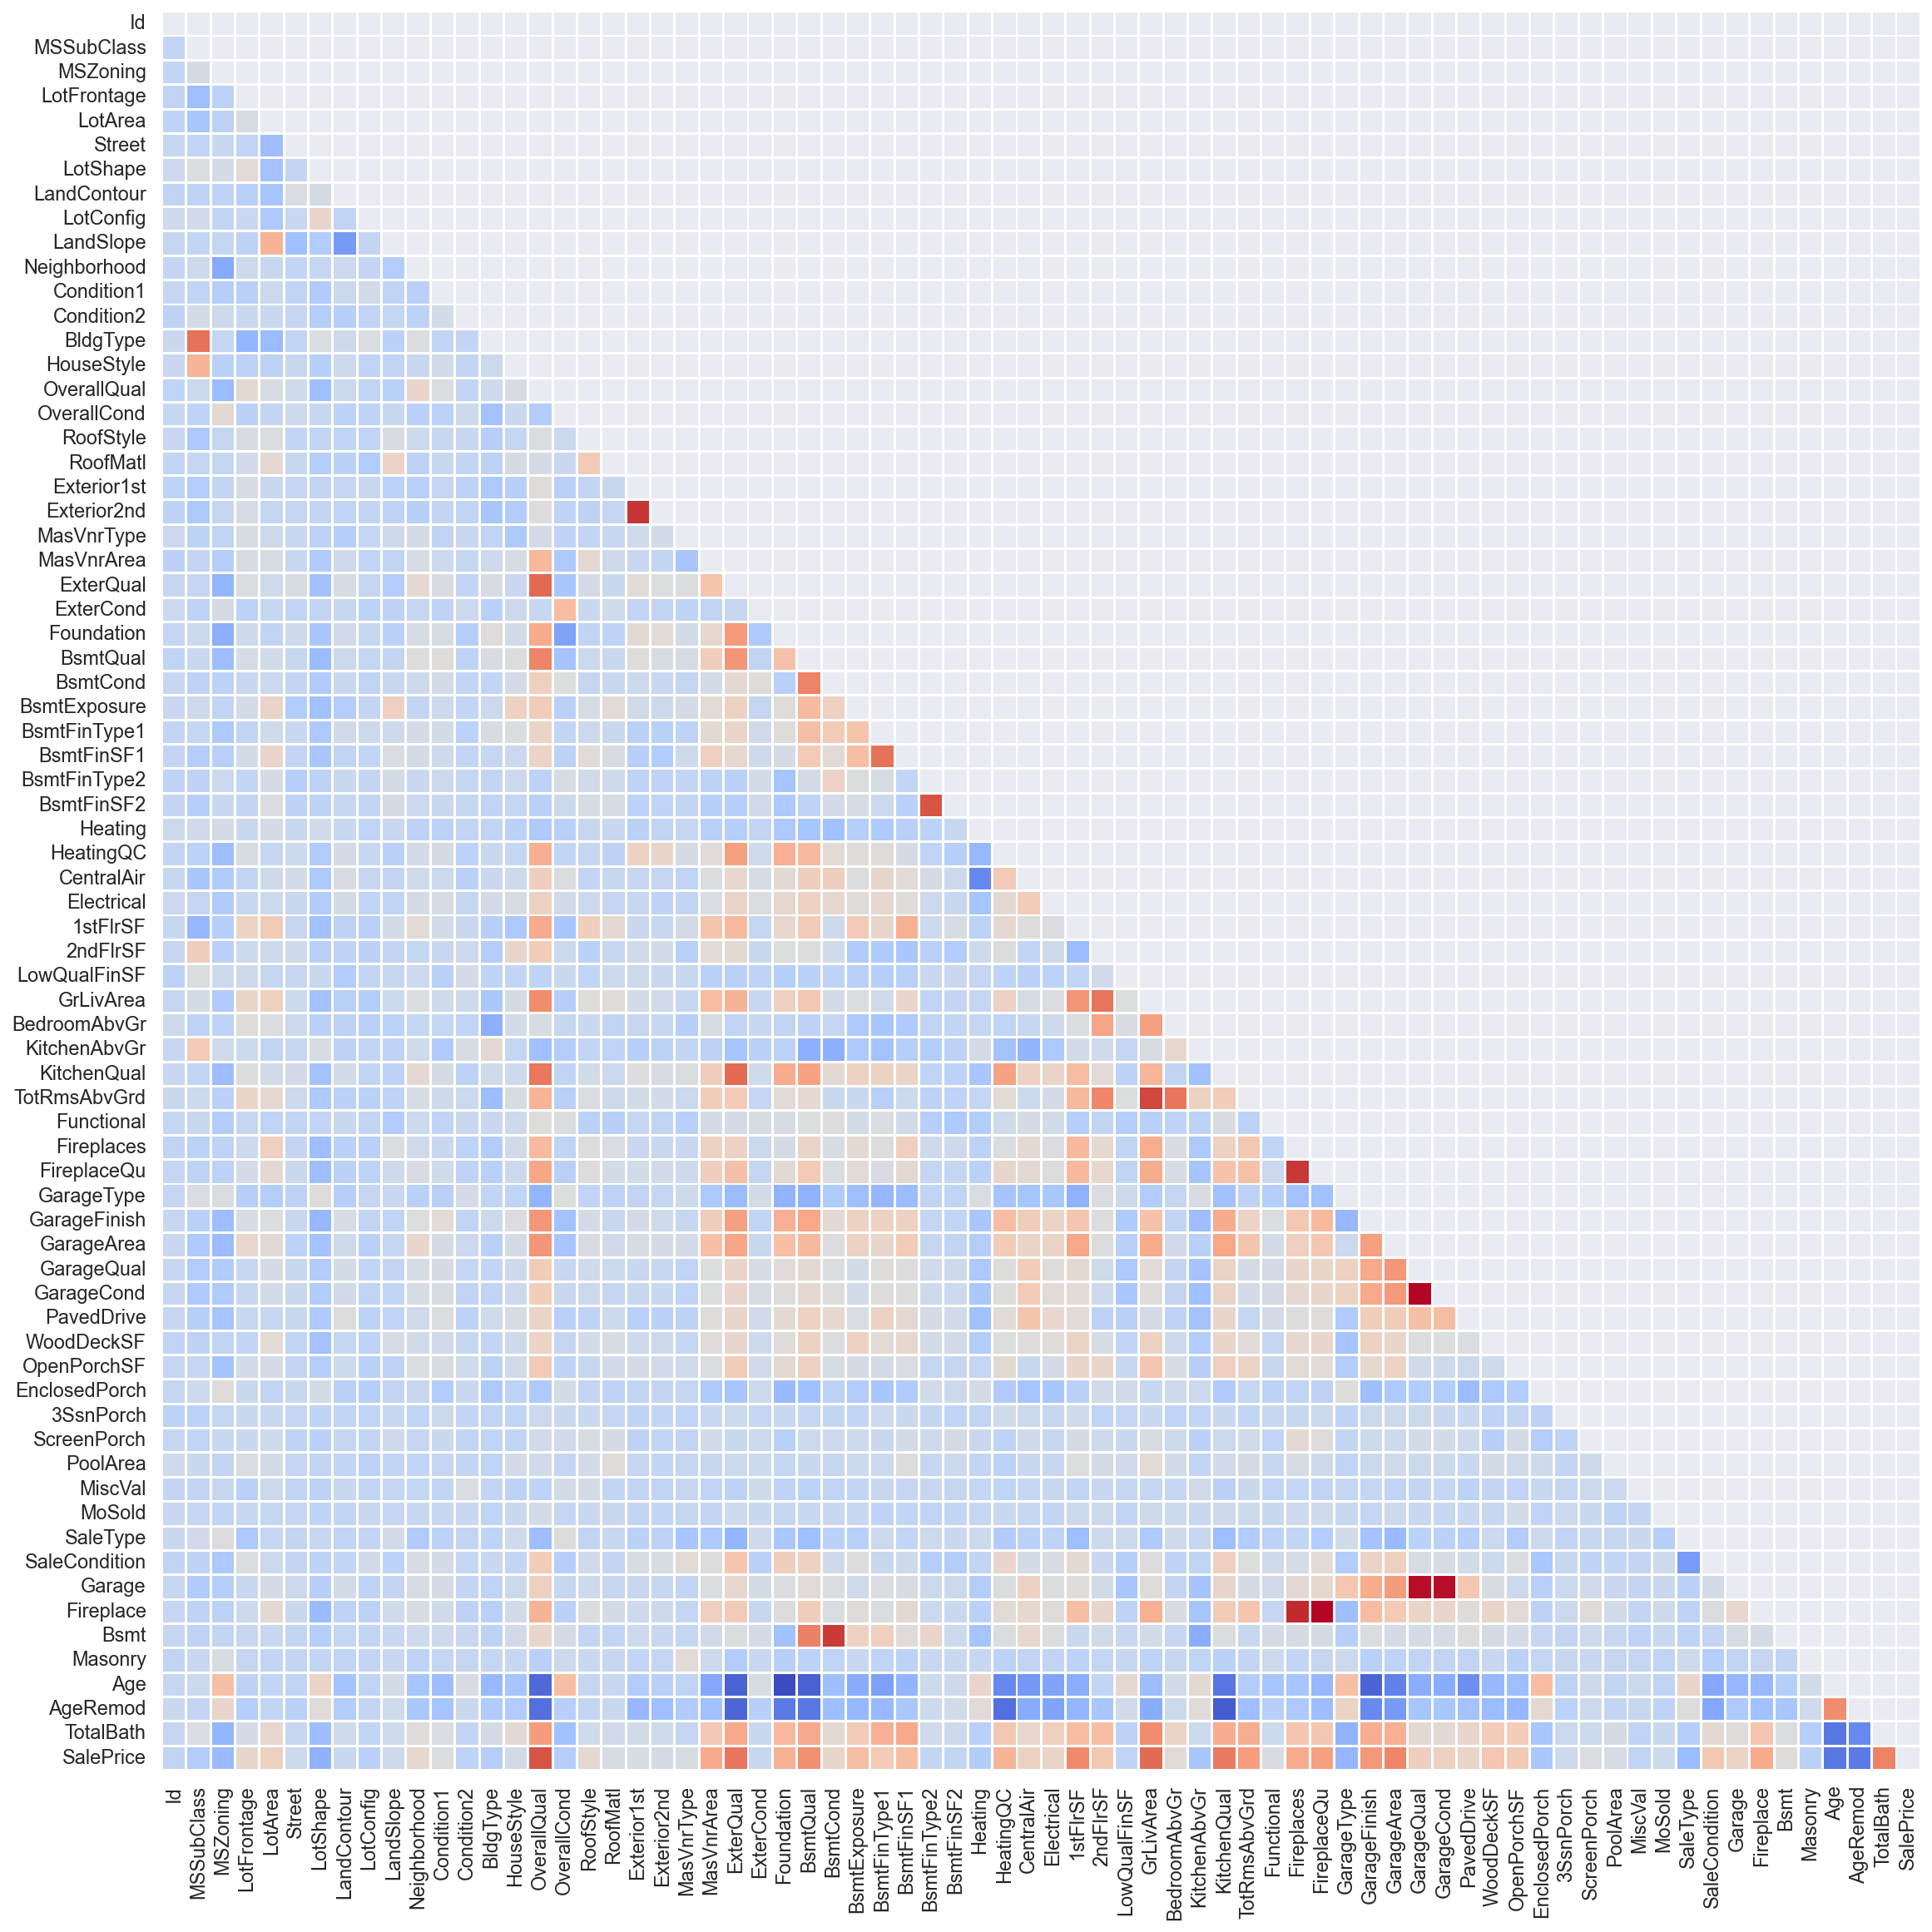

In [53]:
correlation_matrix = X_y.corr()

mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=1.1)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix,  fmt='.1f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

In [54]:
# check which features are the most correlated with SalePrice
corr = abs(X_y.corr()["SalePrice"]).sort_values(ascending=False)[1:]
corr

OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
TotalBath        0.631731
GarageArea       0.623431
1stFlrSF         0.605852
BsmtQual         0.585207
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
Age              0.523350
FireplaceQu      0.520438
AgeRemod         0.509079
MasVnrArea       0.472614
Fireplace        0.471908
Fireplaces       0.466929
Foundation       0.443704
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
WoodDeckSF       0.324413
SaleCondition    0.322119
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
LotShape         0.255580
CentralAir       0.251328
Garage           0.236832
GarageType       0.234896
PavedDrive       0.231357
Electrical       0.230864
BsmtCond         0.212607
MSZoning         0.211230
LotFrontage      0.209624
SaleType         0.208564
Neighborhood

## Expiremental datasets

I had some theories about data so I decided to create several datasets based on one we have now and test them

In [55]:
# shuffle data and create new X and y for testing (30% from shuffled data)
X_y_0 = X.copy()
X_y_0['SalePrice'] = y
X_y_0 = X_y_0.sample(frac=1)
X_y_0 = X_y_0.iloc[:int(0.3*(X_y_0.shape[0])), :]
X_y_0.shape
X0 = X_y_0.drop('SalePrice', axis=1)
y0 = X_y_0['SalePrice']

In [56]:
X0.shape

(438, 71)

### X1 - drop rows with outliers and colunms with mostly values is 0

In [57]:
X1 = X0.copy()
y1 = y0.copy()

for key, value in outliners_dict.items():
    if value == 0 and (key in X1.columns):
        X1 = X1.drop(key, axis=1)
    elif (key in X1.columns):
        y1 = y1.drop(X1[X1[key] > value].index, axis=0)
        X1 = X1.drop(X1[X1[key] > value].index, axis=0)

In [58]:
X1.shape

(422, 67)

In [59]:
y1.shape

(422,)

### X2 - drop created boolean features to see if they're usefull

In [61]:
X2 = X0.copy()
y2 = y0.copy()
X2 = X2.drop('Garage', axis=1)
X2 = X2.drop('Fireplace', axis=1)
X2 = X2.drop('Bsmt', axis=1)
X2 = X2.drop('Masonry', axis=1)
X2.shape

(438, 67)

### X3 - drop low correlated with target features ( < 0.5)

In [62]:
X3 = X0.copy()
y3 = y0.copy()
corr = X_y_0.corr()
features_to_drop = corr.index[abs(corr["SalePrice"]) < 0.5]
X3 = X3.drop(features_to_drop, axis=1)

In [63]:
X3.shape

(438, 12)

In [64]:
X3.columns

Index(['OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtQual', '1stFlrSF',
       'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageArea',
       'Age', 'TotalBath'],
      dtype='object')

## XGBoost

### Building model

In [65]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [66]:
xgb_model = XGBRegressor(eval_metric='rmse')

In [67]:
param_grid_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, verbose=1, scoring='neg_root_mean_squared_error')

### Test expiremental datasets (X1, X2, X3)

In [71]:
errors = []
Xs = [X0, X1, X2, X3]
ys = [y0, y1, y2, y3]
i = 0
for Xt, yt in zip(Xs, ys):
    print(f'X{i} \n')
    grid_search_xgb.fit(Xt, np.log(yt))
    errors.append([round(-grid_search_xgb.score(Xt, np.log(yt)),4), round(-grid_search_xgb.best_score_,4)])

X0 

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  5.0min finished


X0 

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  4.4min finished


X0 

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  4.5min finished


X0 

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  3.0min finished


In [75]:
for i in range(4):
    print(f'X{i} train error: {errors[i][0]}')
    print(f'X{i} validation error: {errors[i][1]}')

X0 train error: 0.1362
X0 validation error: 0.1673
X1 train error: 0.1313
X1 validation error: 0.1665
X2 train error: 0.1362
X2 validation error: 0.1673
X3 train error: 0.1546
X3 validation error: 0.1706


According to the results:
- it's better to drop outliners
- new boolean features are useless
- it's better not to drop low correlated features
<br><br> Now we can use X1 and X2 changes on X. We can trust the results because sample X0 is representative 
<br><br> __Note:__ X1 one type of changes can't be used in competition, because it requires to delete rows wich in turn will change shape and it'll be impossible for autochecking system to copmare results. __But__ I'll use it to see what we'll get on CV score

__changing X, y as X1 and X2__

In [68]:
# changing X, y as X1 and X2

for key, value in outliners_dict.items():
    if value == 0 and (key in X.columns):
        X = X.drop(key, axis=1)
    elif (key in X.columns):
        y = y.drop(X[X[key] > value].index, axis=0)
        X = X.drop(X[X[key] > value].index, axis=0)

X = X.drop('Garage', axis=1)
X = X.drop('Fireplace', axis=1)
X = X.drop('Bsmt', axis=1)
X = X.drop('Masonry', axis=1)

In [69]:
X.shape

(1414, 63)

### Training model

In [78]:
grid_search_xgb.fit(X, np.log(y))
grid_search_xgb.best_params_

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  6.2min finished


{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 0.8}

### Best score 

In [79]:
print("RMSLE on training data:",round(-grid_search_xgb.score(X, np.log(y)),4))
print("RMSLE on validation data:",round(-grid_search_xgb.best_score_,4))

RMSLE on training data: 0.1238
RMSLE on validation data: 0.147


## Feature Importance

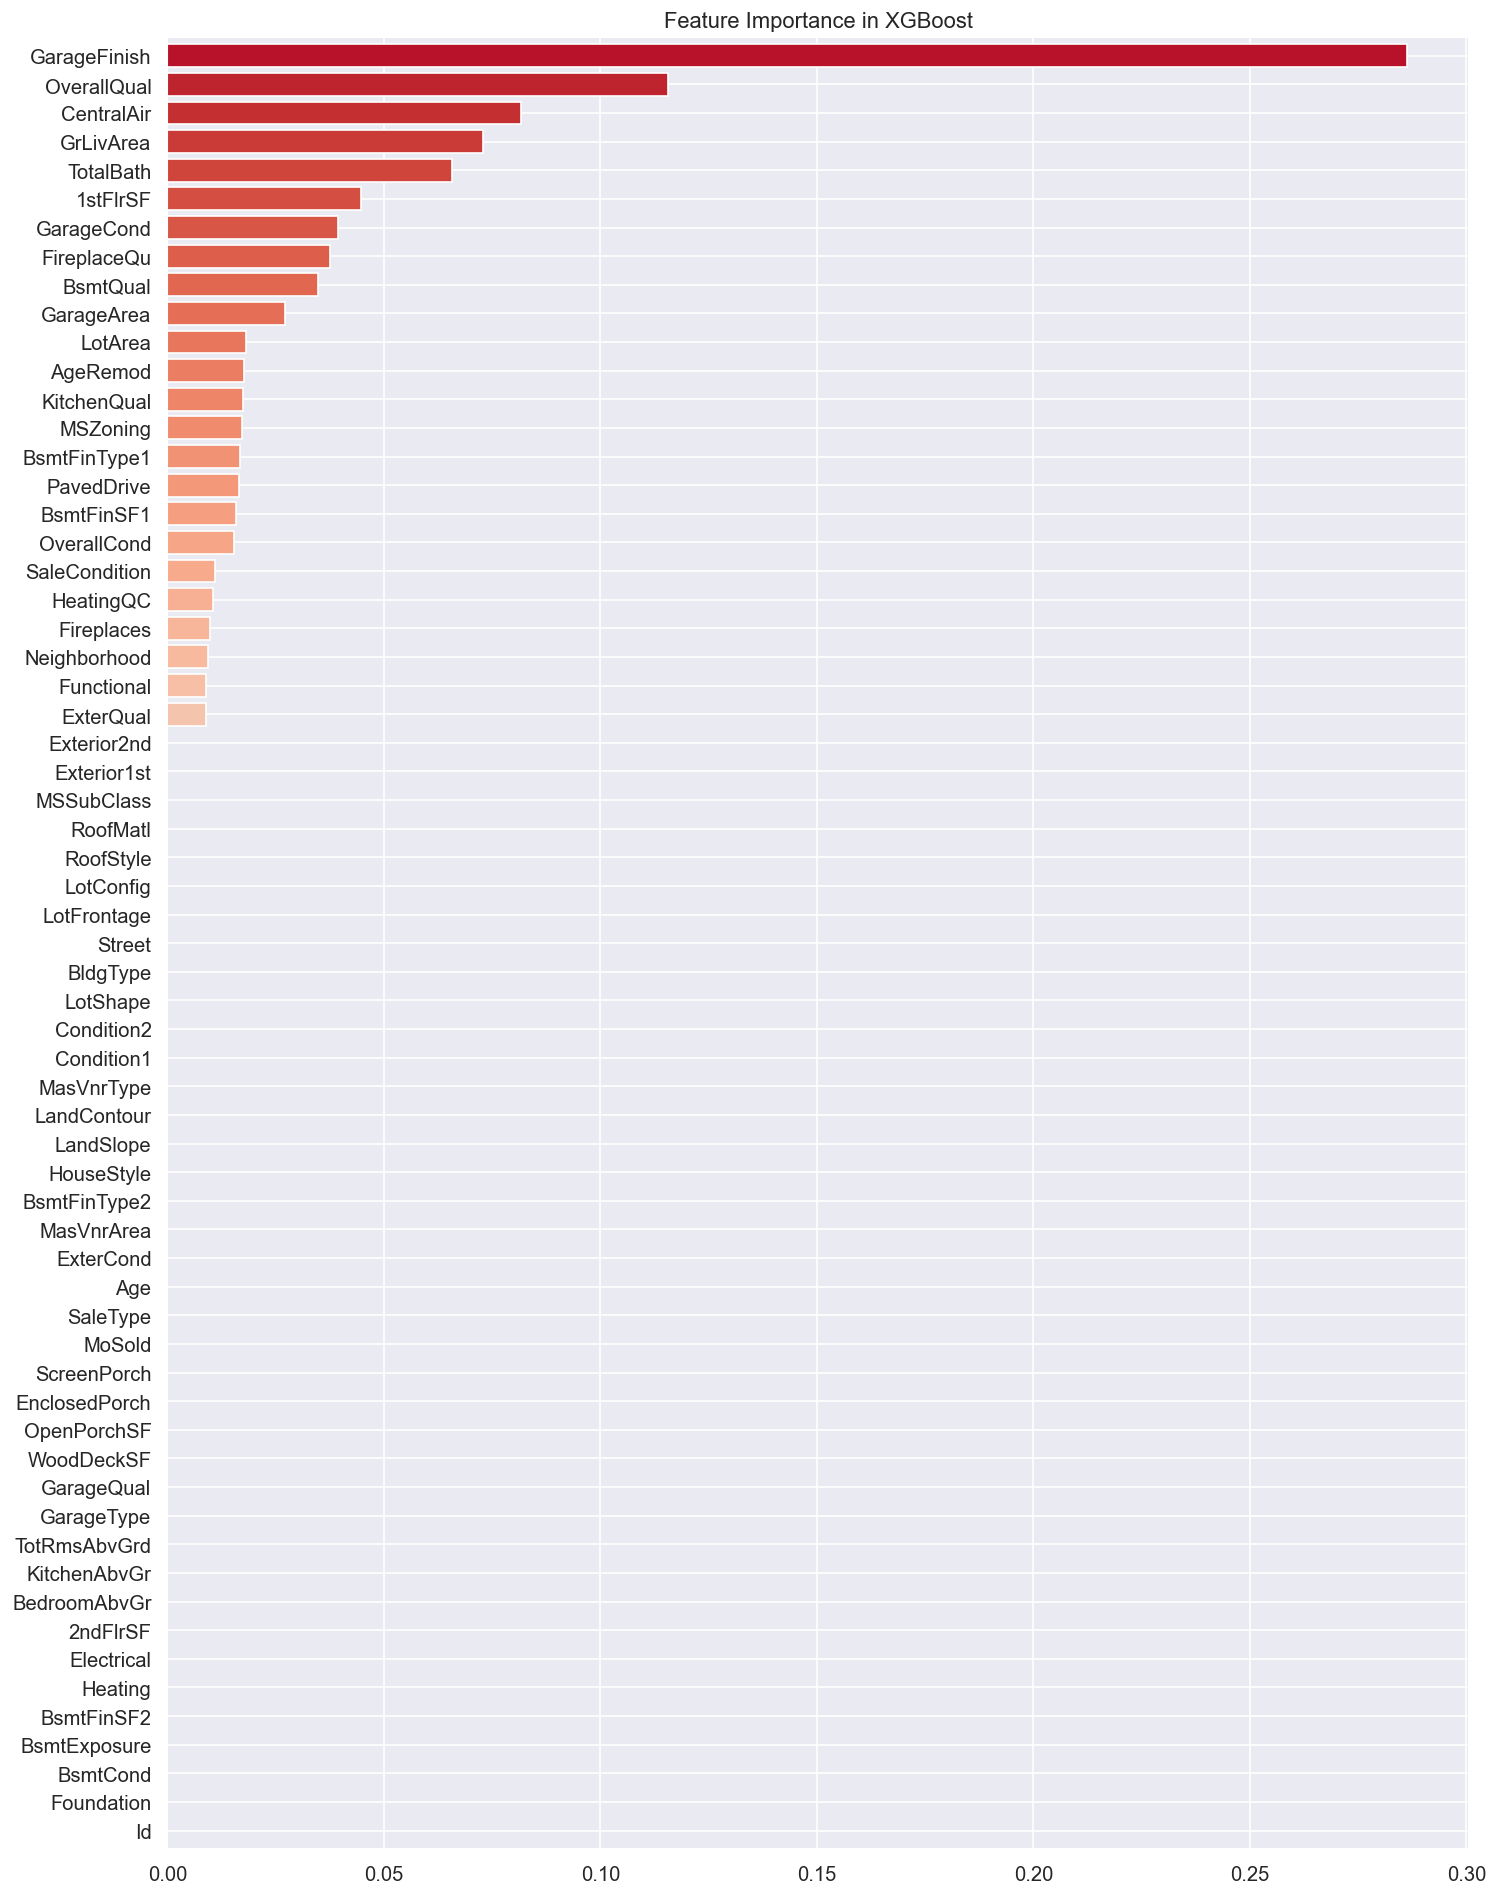

In [85]:
feature_imp = grid_search_xgb.best_estimator_.feature_importances_
feature_imp_sorted_series = pd.Series(feature_imp,X.columns).sort_values(ascending=True)

# Plot horizaontal bar plot
plt.figure(figsize=(14,20), dpi=120)
palette = sns.color_palette("coolwarm", len(X.columns)).as_hex()
ax = feature_imp_sorted_series.plot.barh(width=0.8 ,color=palette)
ax.set_title('Feature Importance in XGBoost')
plt.show()

### Conclusion about features: 
According to bar plots above, there are no unexpected results. Almost all the features have correlation with target higher than 0.5. But there are also seems like model used __only__ highly correlated features